In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/door-dash/datasets/historical_data.csv


In [4]:
ddash = pd.read_csv('/kaggle/input/door-dash/datasets/historical_data.csv')

In [5]:
ddash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [6]:
ddash.head(10)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,5477,NaN,1.0,3,5000,3,1500,1900,2.0,2.0,2.0,446,338.0
6,3.0,2015-01-31 02:16:36,2015-01-31 02:43:00,5477,NaN,1.0,2,3900,2,1200,2700,10.0,9.0,9.0,446,638.0
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,5477,NaN,1.0,4,4850,4,750,1800,7.0,8.0,7.0,446,626.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0
9,3.0,2015-02-18 01:15:45,2015-02-18 02:08:57,5477,NaN,1.0,2,2100,2,700,1200,2.0,2.0,2.0,446,715.0


In [7]:
ddash[ddash.duplicated(keep=False)]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration


In [8]:
ddash.isna().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

In [9]:
threshold = int(len(ddash) * 0.05)
print(threshold)

9871


In [10]:
cols_to_drop = ddash.columns[ddash.isna().sum() <= threshold]
print(cols_to_drop)

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration'],
      dtype='object')


In [11]:
ddash.dropna(subset=cols_to_drop, inplace=True)

In [12]:
cols_with_missing_values = ddash.columns[ddash.isna().sum()>0]
print(cols_with_missing_values)

Index(['total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders'],
      dtype='object')


In [13]:
ddash['created_at'] = pd.to_datetime(ddash['created_at'])
ddash['actual_delivery_time'] = pd.to_datetime(ddash['actual_delivery_time'])

ddash['actual_total_delivery_duration'] = (ddash['actual_delivery_time'] - ddash['created_at']).dt.seconds

In [14]:
ddash['actual_total_delivery_duration'] = (ddash['actual_delivery_time'] - ddash['created_at']).dt.total_seconds()

In [15]:
store_category_wait_times_mean = ddash.groupby('store_primary_category')['actual_total_delivery_duration'].mean().sort_values(ascending=False)

In [16]:
store_category_wait_times_mean / 60

store_primary_category
italian        70.329332
spanish        56.178378
caribbean      56.111111
brazilian      55.724405
belgian        54.991667
                 ...    
fast           43.852149
gluten-free    42.028495
kosher         41.576144
indonesian     40.750000
chocolate      34.133333
Name: actual_total_delivery_duration, Length: 74, dtype: float64

In [17]:
ddash.groupby('store_primary_category')['estimated_store_to_consumer_driving_duration'].mean().sort_values(ascending=False) / 60

store_primary_category
alcohol-plus-food    13.183333
indonesian           10.908333
soup                 10.494369
caribbean            10.302579
malaysian            10.119865
                       ...    
gastropub             7.942391
european              7.834091
tapas                 7.010532
moroccan              6.884000
convenience-store     6.733189
Name: estimated_store_to_consumer_driving_duration, Length: 74, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


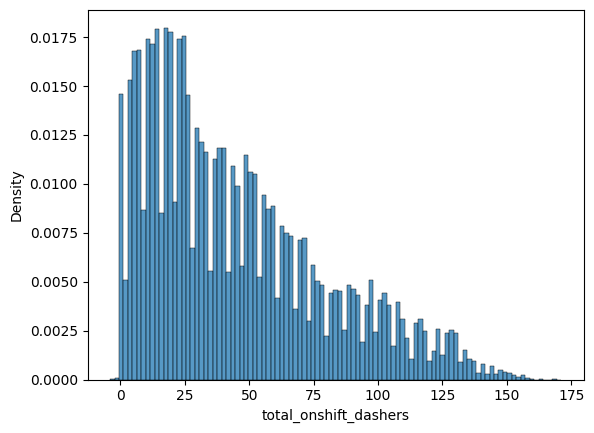

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


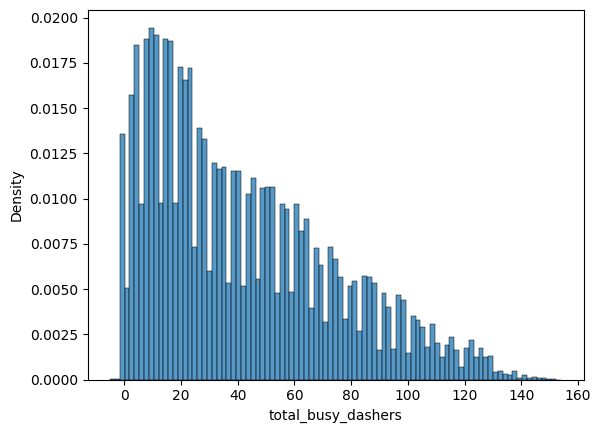

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


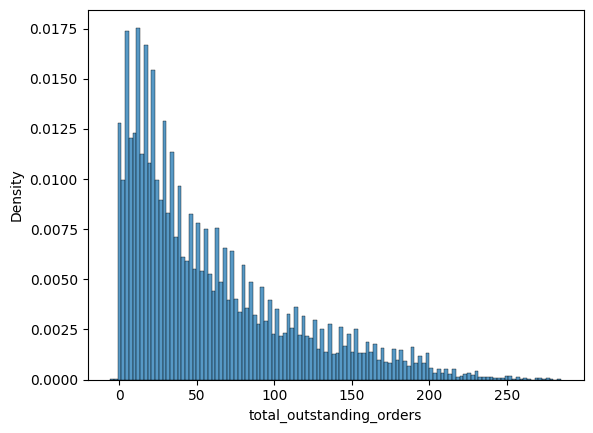

In [18]:
for col in cols_with_missing_values:
    sns.histplot(data=ddash, x=col, stat='density')
    plt.show()

In [19]:
cols_with_missing_values

Index(['total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders'],
      dtype='object')

In [20]:
ddash['total_onshift_dashers'].median()

37.0

In [21]:
ddash[cols_with_missing_values].astype(float)

,total_onshift_dashers,total_busy_dashers,total_outstanding_orders
0,33.0,14.0,21.0
1,1.0,2.0,2.0
8,8.0,6.0,18.0
14,5.0,6.0,8.0
15,5.0,5.0,7.0
...,...,...,...
197423,17.0,17.0,23.0
197424,12.0,11.0,14.0
197425,39.0,41.0,40.0
197426,7.0,7.0,12.0


In [22]:
nan_check = ddash[ddash['total_onshift_dashers'].isnull()]['total_onshift_dashers']

In [23]:
nan_check

160      NaN
161      NaN
162      NaN
163      NaN
164      NaN
          ..
197196   NaN
197197   NaN
197198   NaN
197199   NaN
197421   NaN
Name: total_onshift_dashers, Length: 15630, dtype: float64

In [24]:
ddash['total_onshift_dashers'].iloc[139]

nan

In [25]:
for col in cols_with_missing_values:
    print(ddash[col].median())

37.0
35.0
41.0


In [26]:
for col in cols_with_missing_values:
    ddash[col] = ddash[col].fillna(ddash[col].mean())

In [27]:
ddash['total_onshift_dashers'].iloc[160]

34.0

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


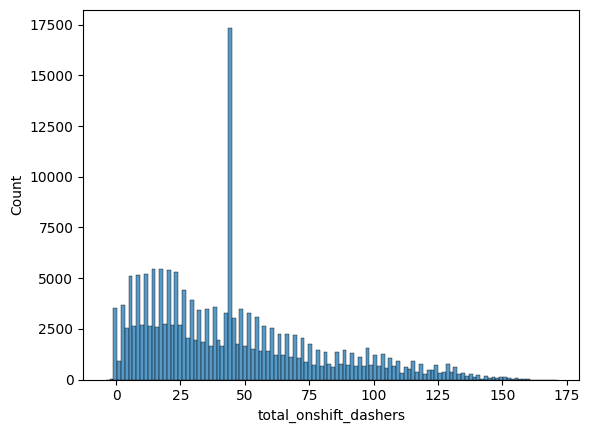

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


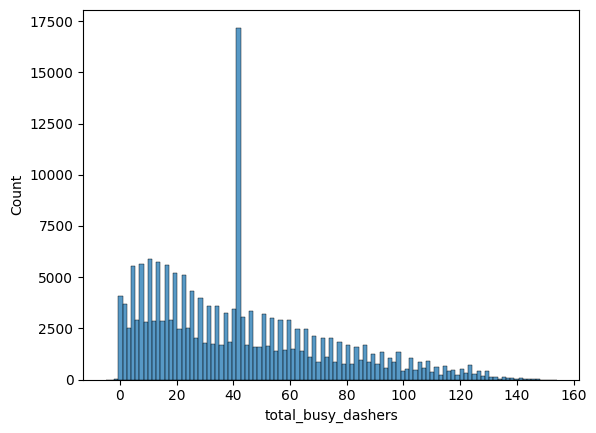

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


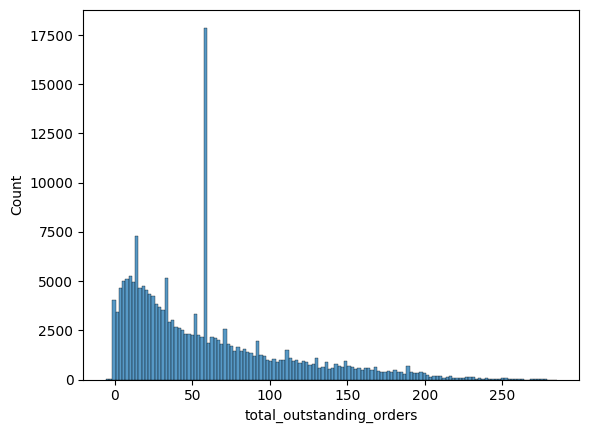

In [28]:
for col in cols_with_missing_values:
    sns.histplot(data=ddash, x=col)
    plt.show()

In [29]:
cols_with_missing_values

Index(['total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders'],
      dtype='object')

In [30]:
total_onshift_dashers_sqrt = np.sqrt(ddash['total_onshift_dashers'])

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [31]:
ddash['total_onshift_dashers'].std()

33.10424912754849

In [32]:
total_onshift_dashers_sqrt.std()

2.5931329748880882

In [33]:
ddash['total_onshift_dashers'].isna().sum()

0

In [34]:
ddash['actual_total_delivery_duration']

0         3779.0
1         4024.0
8         1586.0
14        2273.0
15        2988.0
           ...  
197423    3907.0
197424    3383.0
197425    3008.0
197426    3907.0
197427    2228.0
Name: actual_total_delivery_duration, Length: 191407, dtype: float64

In [35]:
ddash['total_busy_dashers']

0         14.0
1          2.0
8          6.0
14         6.0
15         5.0
          ... 
197423    17.0
197424    11.0
197425    41.0
197426     7.0
197427    20.0
Name: total_busy_dashers, Length: 191407, dtype: float64

In [36]:
ddash['total_onshift_dashers']

0         33.0
1          1.0
8          8.0
14         5.0
15         5.0
          ... 
197423    17.0
197424    12.0
197425    39.0
197426     7.0
197427    20.0
Name: total_onshift_dashers, Length: 191407, dtype: float64

In [37]:
ddash['busy_dashers_ratio'] = ddash['total_busy_dashers'] / ddash['total_onshift_dashers']

In [38]:
ddash['busy_dashers_ratio']

0         0.424242
1         2.000000
8         0.750000
14        1.200000
15        1.000000
            ...   
197423    1.000000
197424    0.916667
197425    1.051282
197426    1.000000
197427    1.000000
Name: busy_dashers_ratio, Length: 191407, dtype: float64

Delivery times compared to time of the day

In [39]:
ddash['actual_delivery_time_without_date'] = ddash['actual_delivery_time'].dt.time

In [40]:
ddash['actual_delivery_time_without_date']

0         23:27:16
1         22:56:29
8         00:38:01
14        04:14:39
15        03:02:24
            ...   
197423    01:24:48
197424    00:58:22
197425    05:36:16
197426    19:23:22
197427    20:01:41
Name: actual_delivery_time_without_date, Length: 191407, dtype: object

In [41]:
import datetime
def check_time(time):
    '''
        Takes time as datetime object and assigns time of the day
    '''
    time_ranges = [
        (datetime.time(6, 0), datetime.time(12, 0), 'morning'),
        (datetime.time(12, 0), datetime.time(18, 0), 'afternoon'),
        (datetime.time(18, 0), datetime.time(23, 59), 'evening')
    ]
    
    for start, end, label in time_ranges:
        if start <= time <= end:
            return label
    return 'night'

In [42]:
check_time.__doc__

'\n        Takes time as datetime object and assigns time of the day\n    '

In [43]:
ddash['time_of_the_day'] = ddash['actual_delivery_time_without_date'].apply(lambda x: check_time(x))
print(ddash['time_of_the_day'])

0         evening
1         evening
8           night
14          night
15          night
           ...   
197423      night
197424      night
197425      night
197426    evening
197427    evening
Name: time_of_the_day, Length: 191407, dtype: object


In [44]:
ddash

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,busy_dashers_ratio,actual_delivery_time_without_date,time_of_the_day
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,0.424242,23:27:16,evening
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,2.000000,22:56:29,evening
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0,1586.0,0.750000,00:38:01,night
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,2841,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0,2273.0,1.200000,04:14:39,night
15,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,2841,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0,2988.0,1.000000,03:02:24,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0,3907.0,1.000000,01:24:48,night
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0,3383.0,0.916667,00:58:22,night
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0,3008.0,1.051282,05:36:16,night
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0,3907.0,1.000000,19:23:22,evening


In [45]:
delivery_time_time_of_the_day_grouped = ddash.groupby('time_of_the_day')['actual_total_delivery_duration'].mean() / 60

<Axes: xlabel='Time of the day', ylabel='Delivery time (minutes)'>

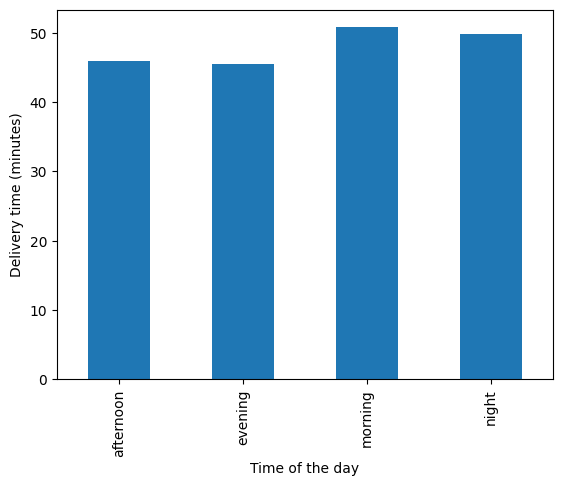

In [46]:
delivery_time_time_of_the_day_grouped.plot(kind='bar',
                                          xlabel='Time of the day',
                                          ylabel='Delivery time (minutes)')

Is localization depends on delivery time

In [47]:
delivery_time_market_id_grouped = ddash.groupby('market_id')['actual_total_delivery_duration'].mean() / 60

<Axes: xlabel='market_id (localization)', ylabel='Delivery time (minutes)'>

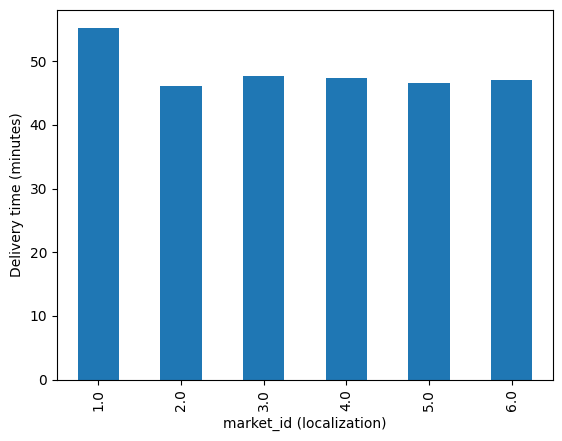

In [48]:
delivery_time_market_id_grouped.plot(kind='bar', 
                                     xlabel='market_id (localization)', 
                                     ylabel='Delivery time (minutes)')

Influence of restaurant type on delivery time

In [49]:
ddash

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,busy_dashers_ratio,actual_delivery_time_without_date,time_of_the_day
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,0.424242,23:27:16,evening
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,2.000000,22:56:29,evening
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0,1586.0,0.750000,00:38:01,night
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,2841,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0,2273.0,1.200000,04:14:39,night
15,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,2841,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0,2988.0,1.000000,03:02:24,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0,3907.0,1.000000,01:24:48,night
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0,3383.0,0.916667,00:58:22,night
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0,3008.0,1.051282,05:36:16,night
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0,3907.0,1.000000,19:23:22,evening


In [50]:
store_cat_delivery_time_grouped = ddash.groupby('store_primary_category')['actual_total_delivery_duration'].mean() / 60

In [51]:
store_cat_delivery_time_grouped

store_primary_category
afghan               51.274718
african              50.810000
alcohol              44.938360
alcohol-plus-food    50.766667
american             47.779504
                       ...    
thai                 48.614439
turkish              44.472175
vegan                47.903345
vegetarian           46.696778
vietnamese           45.347993
Name: actual_total_delivery_duration, Length: 74, dtype: float64

In [52]:
store_cat_delivery_time_grouped = store_cat_delivery_time_grouped.reset_index().sort_values(by='actual_total_delivery_duration')

In [53]:
store_cat_delivery_time_grouped

,store_primary_category,actual_total_delivery_duration
21,chocolate,34.133333
37,indonesian,40.750000
42,kosher,41.576144
33,gluten-free,42.028495
28,fast,43.852149
...,...,...
8,belgian,54.991667
9,brazilian,55.724405
17,caribbean,56.111111
65,spanish,56.178378


In [54]:
store_cat_delivery_time_grouped['store_primary_category'].unique()

array(['chocolate', 'indonesian', 'kosher', 'gluten-free', 'fast',
       'turkish', 'mexican', 'smoothie', 'sandwich', 'alcohol',
       'breakfast', 'hawaiian', 'vietnamese', 'persian', 'gastropub',
       'french', 'cafe', 'other', 'german', 'convenience-store',
       'vegetarian', 'singaporean', 'peruvian', 'mediterranean', 'burger',
       'soup', 'bubble-tea', 'asian', 'pasta', 'seafood', 'greek',
       'dim-sum', 'barbecue', 'pakistani', 'american', 'latin-american',
       'vegan', 'middle-eastern', 'chinese', 'british', 'korean',
       'nepalese', 'irish', 'catering', 'thai', 'european', 'dessert',
       'cheese', 'ethiopian', 'argentine', 'indian', 'filipino',
       'moroccan', 'salad', 'alcohol-plus-food', 'african', 'pizza',
       'comfort-food', 'southern', 'lebanese', 'afghan', 'russian',
       'sushi', 'steak', 'burmese', 'japanese', 'malaysian', 'cajun',
       'tapas', 'belgian', 'brazilian', 'caribbean', 'spanish', 'italian'],
      dtype=object)

[]

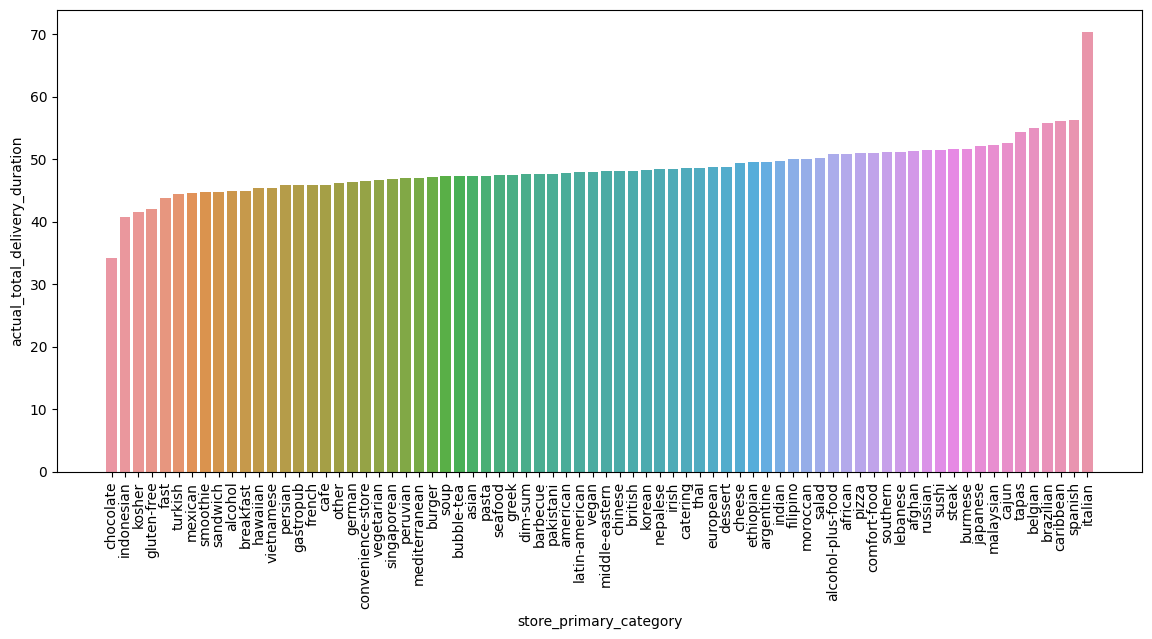

In [55]:
plt.figure(figsize=(14, 6))
sns.barplot(data=store_cat_delivery_time_grouped, x='store_primary_category', y='actual_total_delivery_duration', width=0.8)
plt.xticks(rotation=90)
plt.plot()

It is not very inuitive to drive insights from plot with 74 columns as well as take any conclusions from it, so lets reduce number of categories by mappig them to more general ones

In [56]:
cuisine_mapping = {
    'afghan': 'middle-eastern',
    'african': 'african',
    'alcohol': 'drinks',
    'alcohol-plus-food': 'drinks',
    'american': 'american',
    'argentine': 'latin-american',
    'asian': 'asian',
    'barbecue': 'american',
    'belgian': 'european',
    'brazilian': 'latin-american',
    'breakfast': 'breakfast',
    'british': 'european',
    'bubble-tea': 'drinks',
    'burger': 'american',
    'burmese': 'asian',
    'cafe': 'cafe',
    'cajun': 'american',
    'caribbean': 'latin-american',
    'catering': 'other',
    'cheese': 'other',
    'chinese': 'asian',
    'chocolate': 'desserts',
    'comfort-food': 'american',
    'convenience-store': 'other',
    'dessert': 'desserts',
    'dim-sum': 'asian',
    'ethiopian': 'african',
    'european': 'european',
    'fast': 'american',
    'filipino': 'asian',
    'french': 'european',
    'gastropub': 'american',
    'german': 'european',
    'gluten-free': 'special',
    'greek': 'european',
    'hawaiian': 'american',
    'indian': 'asian',
    'indonesian': 'asian',
    'irish': 'european',
    'italian': 'european',
    'japanese': 'asian',
    'korean': 'asian',
    'kosher': 'special',
    'latin-american': 'latin-american',
    'lebanese': 'middle-eastern',
    'malaysian': 'asian',
    'mediterranean': 'mediterranean',
    'mexican': 'latin-american',
    'middle-eastern': 'middle-eastern',
    'moroccan': 'african',
    'nepalese': 'asian',
    'other': 'other',
    'pakistani': 'asian',
    'pasta': 'european',
    'persian': 'middle-eastern',
    'peruvian': 'latin-american',
    'pizza': 'european',
    'russian': 'european',
    'salad': 'special',
    'sandwich': 'american',
    'seafood': 'seafood',
    'singaporean': 'asian',
    'smoothie': 'drinks',
    'soup': 'other',
    'southern': 'american',
    'spanish': 'european',
    'steak': 'american',
    'sushi': 'asian',
    'tapas': 'european',
    'thai': 'asian',
    'turkish': 'european',
    'vegan': 'special',
    'vegetarian': 'special',
    'vietnamese': 'asian'
}

ddash['general_cuisine_category'] = ddash['store_primary_category'].map(cuisine_mapping)

In [57]:
ddash['general_cuisine_category'].value_counts()

general_cuisine_category
american          53414
asian             48188
european          29570
latin-american    18391
desserts           8723
other              6025
mediterranean      5473
breakfast          5382
special            4948
drinks             3988
seafood            2710
middle-eastern     2218
cafe               2208
african             169
Name: count, dtype: int64

In [58]:
store_cat_delivery_time_grouped = ddash.groupby('general_cuisine_category')['actual_total_delivery_duration'].mean() / 60
store_cat_delivery_time_grouped = store_cat_delivery_time_grouped.reset_index().sort_values(by='actual_total_delivery_duration')

[]

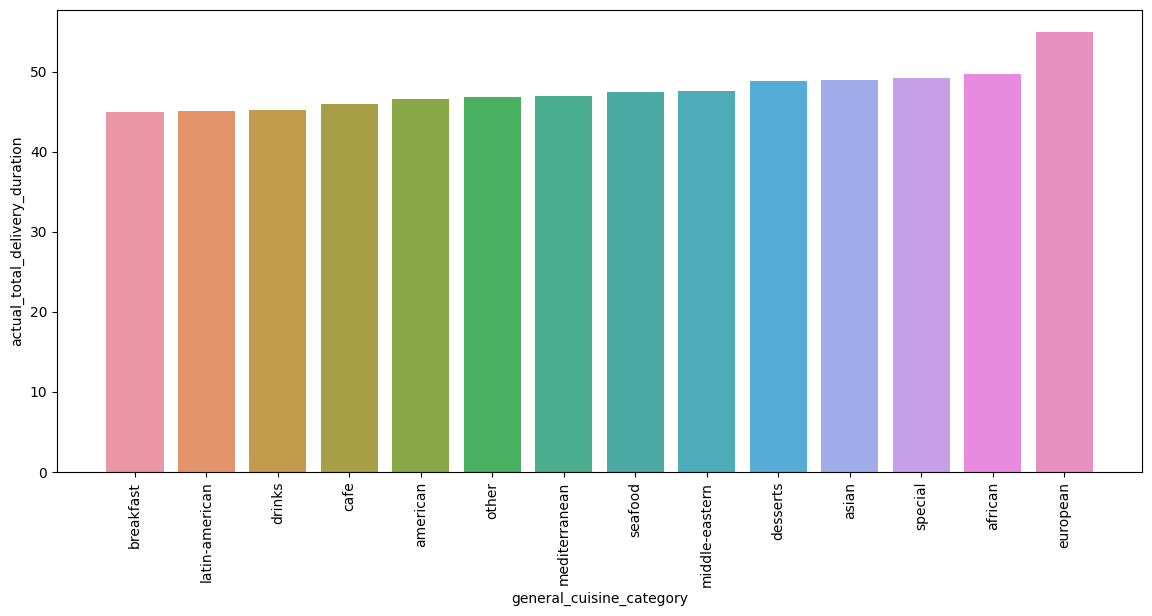

In [59]:
plt.figure(figsize=(14, 6))
sns.barplot(data=store_cat_delivery_time_grouped, x='general_cuisine_category', y='actual_total_delivery_duration', width=0.8)
plt.xticks(rotation=90)
plt.plot()

Item count impact on delivery time

In [60]:
ddash.head(5)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,...,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,busy_dashers_ratio,actual_delivery_time_without_date,time_of_the_day,general_cuisine_category
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,...,33.0,14.0,21.0,446,861.0,3779.0,0.424242,23:27:16,evening,american
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,...,1.0,2.0,2.0,446,690.0,4024.0,2.000000,22:56:29,evening,latin-american
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,...,8.0,6.0,18.0,446,289.0,1586.0,0.750000,00:38:01,night,asian
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,2841,italian,1.0,1,1525,1,1525,...,5.0,6.0,8.0,446,795.0,2273.0,1.200000,04:14:39,night,european
15,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,2841,italian,1.0,2,3620,2,1425,...,5.0,5.0,7.0,446,205.0,2988.0,1.000000,03:02:24,night,european


In [61]:
ddash['actual_total_delivery_duration'].sort_values(ascending=False)

2690      8516859.0
185550     373879.0
27189      332482.0
83055       57032.0
190860      54447.0
            ...    
117928        325.0
42507         321.0
30562         297.0
862           223.0
63294         101.0
Name: actual_total_delivery_duration, Length: 191407, dtype: float64

In [62]:
ddash.loc[2690]

market_id                                                       1.0
created_at                                      2014-10-19 05:24:15
actual_delivery_time                            2015-01-25 19:11:54
store_id                                                       3560
store_primary_category                                      italian
order_protocol                                                  1.0
total_items                                                       1
subtotal                                                       1695
num_distinct_items                                                1
min_item_price                                                 1595
max_item_price                                                 1595
total_onshift_dashers                                     44.918664
total_busy_dashers                                        41.861381
total_outstanding_orders                                  58.230115
estimated_order_place_duration                  

<Axes: xlabel='actual_total_delivery_duration', ylabel='total_items'>

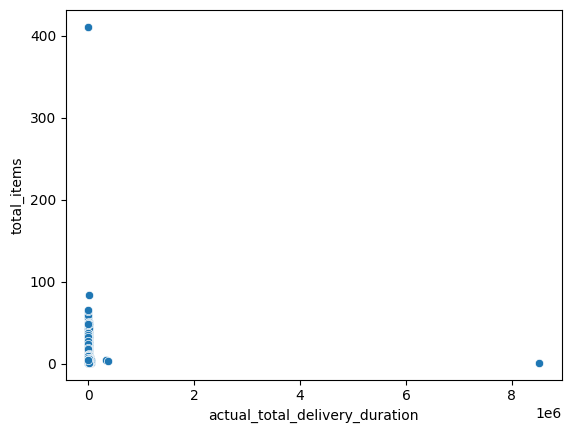

In [63]:
sns.scatterplot(data=ddash, x='actual_total_delivery_duration', y='total_items')

(0.0, 100.0)

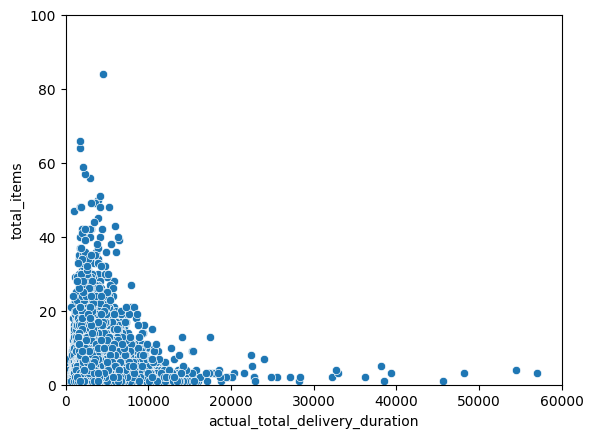

In [64]:
sns.scatterplot(data=ddash, x='actual_total_delivery_duration', y='total_items')
plt.xlim(0, 60000)
plt.ylim(0, 100)

(0.0, 60000.0)

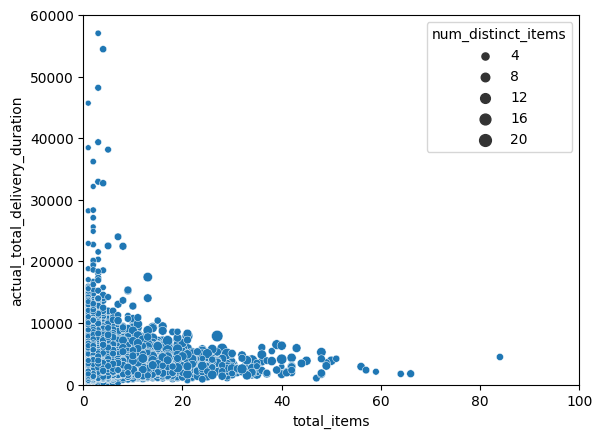

In [65]:
sns.scatterplot(data=ddash, x='total_items', y='actual_total_delivery_duration', size='num_distinct_items')
plt.xlim(0, 100)
plt.ylim(0, 60000)

In [66]:
ddash['total_items'].corr(ddash['actual_total_delivery_duration'])

0.00470980600436065

A value of 0.0047 suggests an almost zero linear relationship between the number of items in an order and delivery time. In other words, changing the number of items in an order has almost no effect on changing the actual delivery time.

Available dashers value vs delivery time

In [67]:
ddash.head(5)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,...,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,busy_dashers_ratio,actual_delivery_time_without_date,time_of_the_day,general_cuisine_category
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,...,33.0,14.0,21.0,446,861.0,3779.0,0.424242,23:27:16,evening,american
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,...,1.0,2.0,2.0,446,690.0,4024.0,2.000000,22:56:29,evening,latin-american
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,...,8.0,6.0,18.0,446,289.0,1586.0,0.750000,00:38:01,night,asian
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,2841,italian,1.0,1,1525,1,1525,...,5.0,6.0,8.0,446,795.0,2273.0,1.200000,04:14:39,night,european
15,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,2841,italian,1.0,2,3620,2,1425,...,5.0,5.0,7.0,446,205.0,2988.0,1.000000,03:02:24,night,european


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total_onshift_dashers', ylabel='Count'>

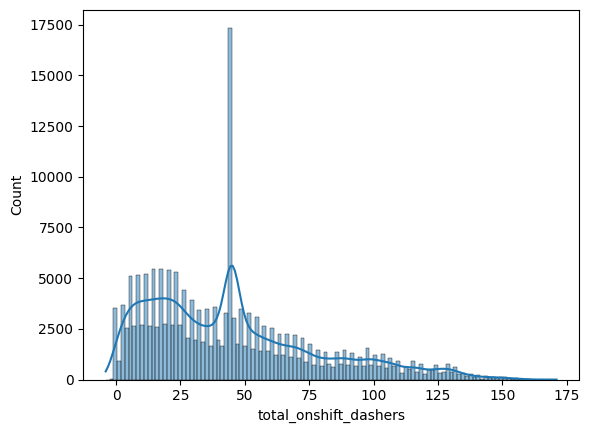

In [68]:
sns.histplot(ddash['total_onshift_dashers'], kde=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total_busy_dashers', ylabel='Count'>

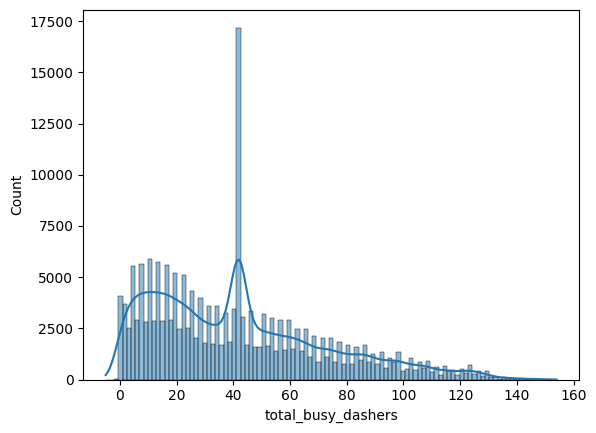

In [69]:
sns.histplot(ddash['total_busy_dashers'], kde=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total_outstanding_orders', ylabel='Count'>

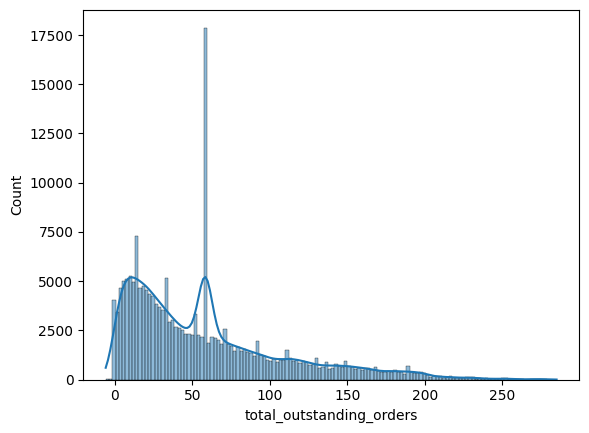

In [70]:
sns.histplot(ddash['total_outstanding_orders'], kde=True)

In [71]:
corr_onshift = ddash['total_onshift_dashers'].corr(ddash['actual_total_delivery_duration'])
corr_busy = ddash['total_busy_dashers'].corr(ddash['actual_total_delivery_duration'])
corr_outstanding = ddash['total_outstanding_orders'].corr(ddash['actual_total_delivery_duration'])

print("Korelacja liczby dostępnych dostawców z czasem dostawy:", corr_onshift)
print("Korelacja liczby zajętych dostawców z czasem dostawy:", corr_busy)
print("Korelacja liczby zamówień w trakcie realizacji z czasem dostawy:", corr_outstanding)

Korelacja liczby dostępnych dostawców z czasem dostawy: 0.003856468053662869
Korelacja liczby zajętych dostawców z czasem dostawy: 0.004960230755834575
Korelacja liczby zamówień w trakcie realizacji z czasem dostawy: 0.009944710427144246


(0.0, 20000.0)

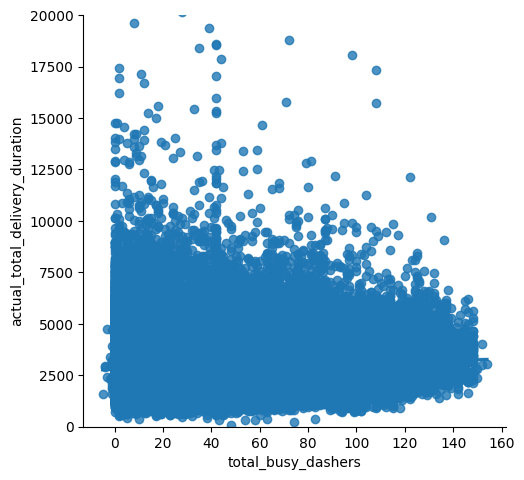

In [72]:
sns.lmplot(x='total_busy_dashers', y='actual_total_delivery_duration', data=ddash)
plt.ylim(0, 20000)

peak time analysis

In [73]:
ddash.head(5)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,...,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,busy_dashers_ratio,actual_delivery_time_without_date,time_of_the_day,general_cuisine_category
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,...,33.0,14.0,21.0,446,861.0,3779.0,0.424242,23:27:16,evening,american
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,...,1.0,2.0,2.0,446,690.0,4024.0,2.000000,22:56:29,evening,latin-american
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,...,8.0,6.0,18.0,446,289.0,1586.0,0.750000,00:38:01,night,asian
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,2841,italian,1.0,1,1525,1,1525,...,5.0,6.0,8.0,446,795.0,2273.0,1.200000,04:14:39,night,european
15,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,2841,italian,1.0,2,3620,2,1425,...,5.0,5.0,7.0,446,205.0,2988.0,1.000000,03:02:24,night,european


In [74]:
ddash['hour_created'] = ddash['actual_delivery_time'].dt.hour

In [75]:
ddash['hour_created']

0         23
1         22
8          0
14         4
15         3
          ..
197423     1
197424     0
197425     5
197426    19
197427    20
Name: hour_created, Length: 191407, dtype: int32

In [76]:
peak_hour_delivery_time_mean = ddash.groupby('hour_created')['actual_total_delivery_duration'].mean()
peak_hour_delivery_time_mean = peak_hour_delivery_time_mean.reset_index().sort_values(by='hour_created')

In [77]:
peak_hour_delivery_time_mean

,hour_created,actual_total_delivery_duration
0,0,2553.150124
1,1,2540.544836
2,2,2856.744426
3,3,3201.482179
4,4,3236.136657
5,5,2987.022195
6,6,2895.171039
7,7,3764.926454
8,8,6335.000000
9,15,3661.472222


<Axes: xlabel='hour_created', ylabel='actual_total_delivery_duration'>

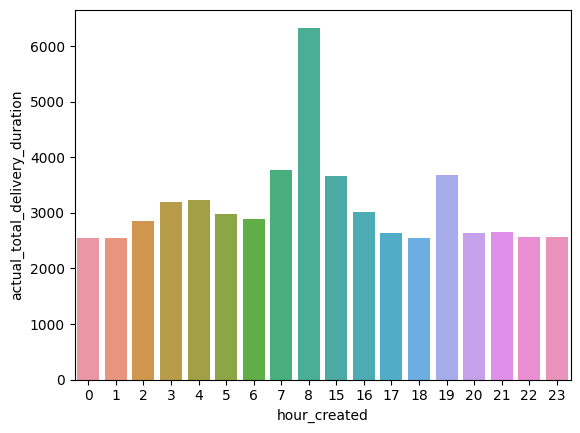

In [78]:
sns.barplot(data=peak_hour_delivery_time_mean, x='hour_created', y='actual_total_delivery_duration')

<Axes: xlabel='busy_dashers_ratio', ylabel='total_onshift_dashers'>

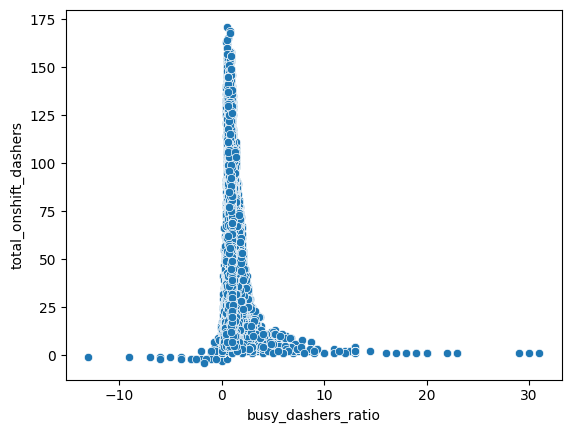

In [79]:
sns.scatterplot(data=ddash, x='busy_dashers_ratio', y='total_onshift_dashers')

In [80]:
ddash['non_preparation_duration'] = ddash['estimated_store_to_consumer_driving_duration'] + ddash['estimated_order_place_duration']

one hot encode nominal variables

In [86]:
market_id_dummies = pd.get_dummies(ddash.market_id, dtype='int')
market_id_dummies = market_id_dummies.add_prefix('market_id_')
market_id_dummies.head(5)

,market_id_1.0,market_id_2.0,market_id_3.0,market_id_4.0,market_id_5.0,market_id_6.0
0,1,0,0,0,0,0
1,0,1,0,0,0,0
8,0,1,0,0,0,0
14,1,0,0,0,0,0
15,1,0,0,0,0,0


In [89]:
ddash['store_id'].value_counts()

store_id
6865    923
1311    850
314     805
1686    755
3937    711
       ... 
6627      1
6907      1
1193      1
1150      1
6165      1
Name: count, Length: 6566, dtype: int64

In [90]:
store_primary_category_dummies = pd.get_dummies(ddash['store_primary_category'], dtype='int')
store_primary_category_dummies = store_primary_category_dummies.add_prefix('category_')
store_primary_category_dummies.head(5)

,category_afghan,category_african,category_alcohol,category_alcohol-plus-food,category_american,category_argentine,category_asian,category_barbecue,category_belgian,category_brazilian,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
store_general_category_dummies = pd.get_dummies(ddash['general_cuisine_category'], dtype='int')
store_general_category_dummies = store_general_category_dummies.add_prefix('category_')
store_general_category_dummies.head(5)

,category_african,category_american,category_asian,category_breakfast,category_cafe,category_desserts,category_drinks,category_european,category_latin-american,category_mediterranean,category_middle-eastern,category_other,category_seafood,category_special
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,1,0,0,0,0,0,0
15,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [109]:
time_of_the_day_dummies = pd.get_dummies(ddash['time_of_the_day'], dtype='int')
time_of_the_day_dummies = time_of_the_day_dummies.add_prefix('time_of_the_')
time_of_the_day_dummies.head(5)

,time_of_the_afternoon,time_of_the_evening,time_of_the_morning,time_of_the_night
0,0,1,0,0
1,0,1,0,0
8,0,0,0,1
14,0,0,0,1
15,0,0,0,1


In [158]:
order_protocol_dummies = pd.get_dummies(ddash['order_protocol'], dtype='int')
order_protocol_dummies = order_protocol_dummies.add_prefix('order_protocol_')
order_protocol_dummies.head(5)

,order_protocol_1.0,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
8,0,0,1,0,0,0,0
14,1,0,0,0,0,0,0
15,1,0,0,0,0,0,0


In [91]:
ddash

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,...,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,busy_dashers_ratio,actual_delivery_time_without_date,time_of_the_day,general_cuisine_category,hour_created,non_preparation_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,...,21.0,446,861.0,3779.0,0.424242,23:27:16,evening,american,23,1307.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,...,2.0,446,690.0,4024.0,2.000000,22:56:29,evening,latin-american,22,1136.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,...,18.0,446,289.0,1586.0,0.750000,00:38:01,night,asian,0,735.0
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,2841,italian,1.0,1,1525,1,1525,...,8.0,446,795.0,2273.0,1.200000,04:14:39,night,european,4,1241.0
15,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,2841,italian,1.0,2,3620,2,1425,...,7.0,446,205.0,2988.0,1.000000,03:02:24,night,european,3,651.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,...,23.0,251,331.0,3907.0,1.000000,01:24:48,night,american,1,582.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,...,14.0,251,915.0,3383.0,0.916667,00:58:22,night,american,0,1166.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,...,40.0,251,795.0,3008.0,1.051282,05:36:16,night,american,5,1046.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,...,12.0,446,384.0,3907.0,1.000000,19:23:22,evening,american,19,830.0


In [115]:
train_df = ddash.drop(
    columns=['order_protocol', 'created_at', 'market_id', 'store_id', 'store_primary_category', 'actual_delivery_time', 'general_cuisine_category', 'time_of_the_day', 'hour_created', 'actual_delivery_time_without_date']
)


print(train_df.shape)
train_df.head()

(191407, 13)


,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,busy_dashers_ratio,non_preparation_duration
0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,0.424242,1307.0
1,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,2.000000,1136.0
8,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0,1586.0,0.750000,735.0
14,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0,2273.0,1.200000,1241.0
15,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0,2988.0,1.000000,651.0


In [116]:
train_df

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,busy_dashers_ratio,non_preparation_duration
0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,0.424242,1307.0
1,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,2.000000,1136.0
8,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0,1586.0,0.750000,735.0
14,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0,2273.0,1.200000,1241.0
15,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0,2988.0,1.000000,651.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,3,1389,3,345,649,17.0,17.0,23.0,251,331.0,3907.0,1.000000,582.0
197424,6,3010,4,405,825,12.0,11.0,14.0,251,915.0,3383.0,0.916667,1166.0
197425,5,1836,3,300,399,39.0,41.0,40.0,251,795.0,3008.0,1.051282,1046.0
197426,1,1175,1,535,535,7.0,7.0,12.0,446,384.0,3907.0,1.000000,830.0


In [117]:
train_df = pd.concat([train_df, time_of_the_day_dummies, market_id_dummies, order_protocol_dummies, store_primary_category_dummies], axis=1)

In [118]:
train_df

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,...,0,0,0,0,0,0,0,0,0,0
1,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,...,0,0,0,0,0,0,0,0,0,0
8,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0,...,0,0,0,0,0,0,0,0,0,0
14,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0,...,0,0,0,0,0,0,0,0,0,0
15,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,3,1389,3,345,649,17.0,17.0,23.0,251,331.0,...,0,0,0,0,0,0,0,0,0,0
197424,6,3010,4,405,825,12.0,11.0,14.0,251,915.0,...,0,0,0,0,0,0,0,0,0,0
197425,5,1836,3,300,399,39.0,41.0,40.0,251,795.0,...,0,0,0,0,0,0,0,0,0,0
197426,1,1175,1,535,535,7.0,7.0,12.0,446,384.0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
train_df = train_df.astype('float32')
train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,33.0,14.0,21.0,446.0,861.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0,446.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4.0,4771.0,3.0,820.0,1604.0,8.0,6.0,18.0,446.0,289.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,1.0,1525.0,1.0,1525.0,1525.0,5.0,6.0,8.0,446.0,795.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,2.0,3620.0,2.0,1425.0,2195.0,5.0,5.0,7.0,446.0,205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
train_df.describe()

/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
count,191407.000000,191407.000000,191407.000000,191407.000000,191407.000000,191407.000000,191407.000000,191407.000000,191407.000000,191407.00000,...,191407.000000,191407.000000,191407.000000,191407.000000,191407.000000,191407.000000,191407.000000,191407.000000,191407.000000,191407.000000
mean,3.193896,2680.282227,2.668591,685.731384,1158.522095,44.918667,41.861385,58.230122,307.497101,545.50592,...,0.000810,0.000193,0.005679,0.011368,0.000752,0.037522,0.001233,0.001458,0.004378,0.031634
std,2.668956,1822.578613,1.628898,520.389771,557.252075,33.104248,30.827116,50.532219,89.592628,219.41983,...,0.028445,0.013902,0.075145,0.106015,0.027418,0.190038,0.035092,0.038151,0.066022,0.175025
min,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1400.000000,1.000000,299.000000,799.000000,19.000000,17.000000,19.000000,251.000000,382.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2200.000000,2.000000,595.000000,1095.000000,41.000000,39.000000,47.000000,251.000000,544.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,3394.000000,3.000000,949.000000,1395.000000,62.000000,60.000000,80.000000,446.000000,702.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [124]:
train_df['busy_dashers_ratio'].describe()

/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


count    1.879040e+05
mean              NaN
std               NaN
min              -inf
25%      8.446602e-01
50%      9.473684e-01
75%      1.000000e+00
max               inf
Name: busy_dashers_ratio, dtype: float64

In [125]:
np.where(np.any(~np.isfinite(train_df), axis=0) == True)

(array([11]),)

In [126]:
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)

In [128]:
train_df.shape

(187866, 103)

należy sprawdzić korelacje miedzy cechami gdyż jest ich dużo, jeśli pomiedzy dwoma jest korelacja nalezy jedną z nich usunąć aby nie miały wplywu na model, sprawdzimy macierz korelacji

In [131]:
corr = train_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

<Axes: >

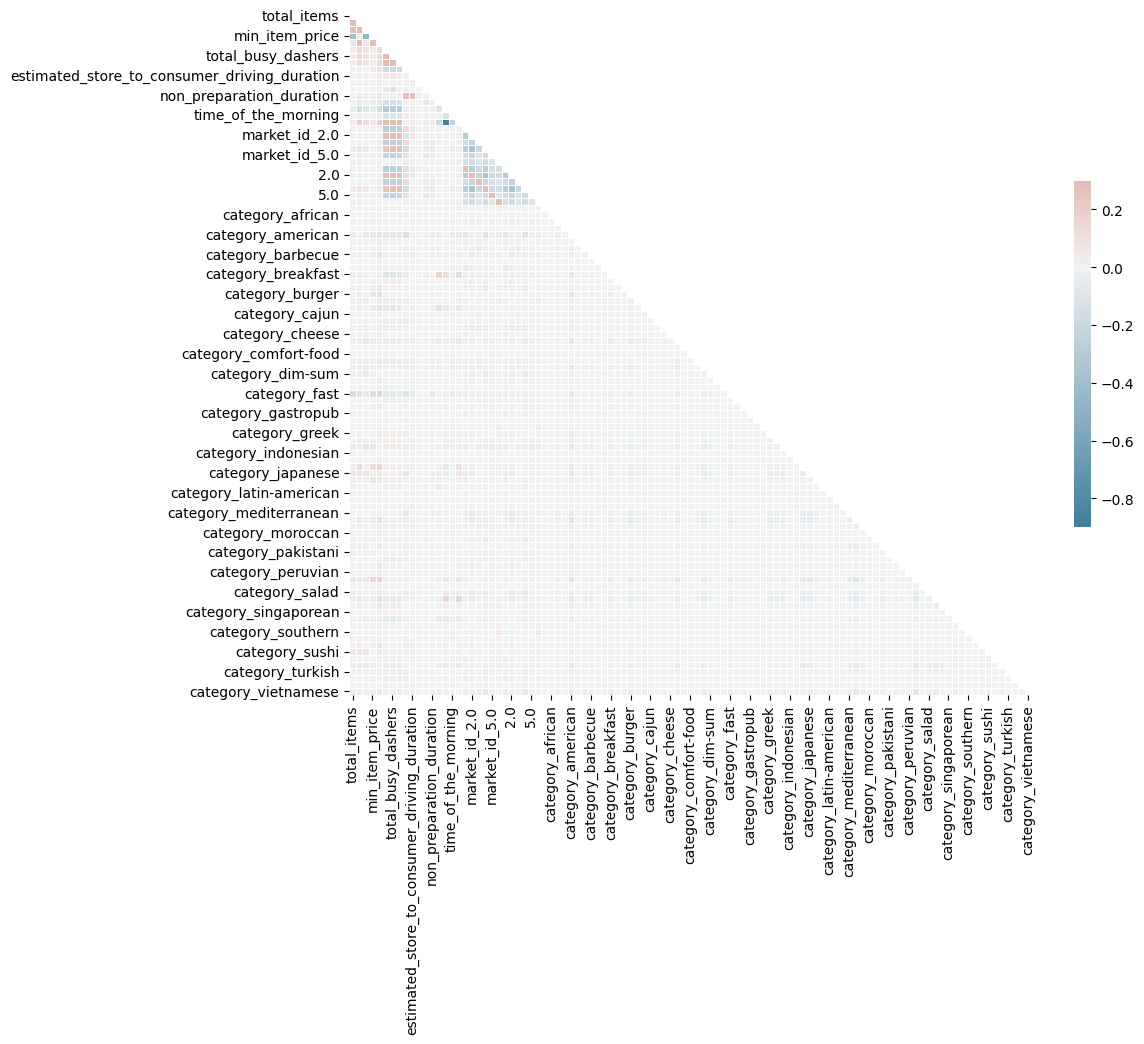

In [132]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [140]:
def get_redundant_pairs(df):
    
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

In [143]:
def get_top_abs_correlations(df, n=5):
    
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [144]:
print('Top absolute correlations')
print(get_top_abs_correlations(train_df, 20))

Top absolute correlations
market_id_3.0                                 3.0                         1.000000
market_id_1.0                                 1.0                         1.000000
market_id_2.0                                 2.0                         1.000000
market_id_5.0                                 5.0                         1.000000
market_id_6.0                                 6.0                         1.000000
market_id_4.0                                 4.0                         1.000000
total_onshift_dashers                         total_busy_dashers          0.941709
                                              total_outstanding_orders    0.934587
total_busy_dashers                            total_outstanding_orders    0.931195
estimated_store_to_consumer_driving_duration  non_preparation_duration    0.924666
time_of_the_evening                           time_of_the_night           0.899443
total_items                                   num_distinct_it

In [159]:
train_df = ddash.drop(
    columns=['order_protocol', 'created_at', 'market_id', 'store_id', 'store_primary_category', 'actual_delivery_time', 'general_cuisine_category', 'time_of_the_day', 'hour_created', 'actual_delivery_time_without_date']
)


In [161]:
train_df = pd.concat(
    [train_df, 
     time_of_the_day_dummies, 
     order_protocol_dummies, 
     store_primary_category_dummies], 
    axis=1
)

train_df = train_df.drop(
    columns=[
        'total_onshift_dashers',
        'total_busy_dashers',
        'non_preparation_duration',
        'time_of_the_evening',
        'time_of_the_night'
    ])

train_df = train_df.astype('float32')
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)

train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,busy_dashers_ratio,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,21.0,446.0,861.0,3779.0,0.424242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,2.0,446.0,690.0,4024.0,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4.0,4771.0,3.0,820.0,1604.0,18.0,446.0,289.0,1586.0,0.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,1.0,1525.0,1.0,1525.0,1525.0,8.0,446.0,795.0,2273.0,1.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,2.0,3620.0,2.0,1425.0,2195.0,7.0,446.0,205.0,2988.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [162]:
order_protocol_dummies.head()

,order_protocol_1.0,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
8,0,0,1,0,0,0,0
14,1,0,0,0,0,0,0
15,1,0,0,0,0,0,0


In [163]:
train_df.shape

(187866, 93)

In [164]:
print('Top absolute correlations')
print(get_top_abs_correlations(train_df, 20))

Top absolute correlations
estimated_order_place_duration  order_protocol_1.0    0.900171
total_items                     num_distinct_items    0.760825
subtotal                        num_distinct_items    0.682125
total_items                     subtotal              0.555243
min_item_price                  max_item_price        0.542474
order_protocol_4.0              category_fast         0.509031
subtotal                        max_item_price        0.506313
num_distinct_items              min_item_price        0.450190
total_items                     min_item_price        0.393214
order_protocol_1.0              order_protocol_3.0    0.375213
estimated_order_place_duration  order_protocol_3.0    0.365835
order_protocol_3.0              order_protocol_5.0    0.335017
order_protocol_1.0              order_protocol_5.0    0.333453
estimated_order_place_duration  order_protocol_5.0    0.323711
order_protocol_2.0              order_protocol_3.0    0.230370
order_protocol_1.0           

In [165]:
train_df = ddash.drop(
    columns=['order_protocol', 'created_at', 'market_id', 'store_id', 'store_primary_category', 'actual_delivery_time', 'general_cuisine_category', 'time_of_the_day', 'hour_created', 'actual_delivery_time_without_date']
)

train_df = pd.concat(
    [train_df, 
     time_of_the_day_dummies,
     store_primary_category_dummies], 
    axis=1
)

train_df = train_df.drop(
    columns=[
        'total_onshift_dashers',
        'total_busy_dashers',
        'non_preparation_duration',
        'time_of_the_evening',
        'time_of_the_night'
    ])

train_df = train_df.astype('float32')
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)

train_df.head()

print('Top absolute correlations')
print(get_top_abs_correlations(train_df, 20))

Top absolute correlations
total_items                     num_distinct_items                0.760825
subtotal                        num_distinct_items                0.682125
total_items                     subtotal                          0.555243
min_item_price                  max_item_price                    0.542474
subtotal                        max_item_price                    0.506313
num_distinct_items              min_item_price                    0.450190
total_items                     min_item_price                    0.393214
                                category_fast                     0.173340
max_item_price                  category_fast                     0.166732
total_outstanding_orders        estimated_order_place_duration    0.166199
max_item_price                  category_italian                  0.165769
                                category_pizza                    0.163470
time_of_the_afternoon           category_breakfast                0.162937

more feature engineering

In [166]:
train_df['percent_distinct_item_of_total'] = train_df['num_distinct_items'] / train_df['total_items']
train_df['avg_price_per_item'] = train_df['subtotal'] / train_df['total_items']
train_df.drop(
    columns=[
        'num_distinct_items',
        'subtotal'
    ], inplace=True)


print('Top absolute correlations')
print(get_top_abs_correlations(train_df, 20))

Top absolute correlations
min_item_price                  avg_price_per_item                0.860623
max_item_price                  avg_price_per_item                0.770317
min_item_price                  max_item_price                    0.542474
total_items                     percent_distinct_item_of_total    0.448830
                                min_item_price                    0.393214
                                avg_price_per_item                0.314680
percent_distinct_item_of_total  avg_price_per_item                0.228378
category_pizza                  avg_price_per_item                0.225858
max_item_price                  percent_distinct_item_of_total    0.180250
min_item_price                  percent_distinct_item_of_total    0.175844
category_fast                   avg_price_per_item                0.175192
total_items                     category_fast                     0.173340
max_item_price                  category_fast                     0.166732

In [167]:
train_df['price_range_of_items'] = train_df['max_item_price'] - train_df['min_item_price']
train_df.drop(
    columns=[
        'max_item_price',
        'min_item_price'
    ], inplace=True)


print('Top absolute correlations')
print(get_top_abs_correlations(train_df, 20))

Top absolute correlations
total_items                     percent_distinct_item_of_total    0.448830
                                price_range_of_items              0.335006
                                avg_price_per_item                0.314680
percent_distinct_item_of_total  avg_price_per_item                0.228378
category_pizza                  avg_price_per_item                0.225858
category_fast                   avg_price_per_item                0.175192
total_items                     category_fast                     0.173340
total_outstanding_orders        estimated_order_place_duration    0.166199
time_of_the_afternoon           category_breakfast                0.162937
category_fast                   percent_distinct_item_of_total    0.155821
category_italian                avg_price_per_item                0.152862
estimated_order_place_duration  category_american                 0.137003
total_outstanding_orders        time_of_the_afternoon             0.130285

In [168]:
train_df.shape

(187866, 85)

removing mulitcolinearity

In [172]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [169]:
def compute_vif(features):
    vif_data = pd.DataFrame()
    vif_data['feature'] = features
    vif_data['VIF'] = [variance_inflation_factor(train_df[features].values, i) for i in range(len(features))]
    return vif_data.sort_values(by=['VIF']).reset_index(drop=True)

In [173]:
features = train_df.drop(columns=['actual_total_delivery_duration']).columns.to_list()
vif_data = compute_vif(features)
vif_data

,feature,VIF
0,category_alcohol-plus-food,1.000452
1,category_chocolate,1.000594
2,category_belgian,1.000936
3,category_indonesian,1.001007
4,category_lebanese,1.003499
...,...,...
79,estimated_store_to_consumer_driving_duration,7.275659
80,category_pizza,7.841563
81,category_american,8.728996
82,estimated_order_place_duration,14.215658


In [178]:
multicollinearity = True

while multicollinearity:
    highest_vif_feature = vif_data['feature'].values.tolist()[-1]
    print('I will remove', highest_vif_feature)
    features.remove(highest_vif_feature)
    vif_data = compute_vif(features)
    multicollinearity = False if len(vif_data[vif_data.VIF > 20]) == 0 else True
    
selected_features = vif_data['feature'].tolist()
vif_data

I will remove estimated_order_place_duration


,feature,VIF
0,category_alcohol-plus-food,1.000187
1,category_belgian,1.000198
2,category_indonesian,1.000238
3,category_chocolate,1.000242
4,category_lebanese,1.001011
...,...,...
77,category_american,3.184497
78,category_pizza,3.259770
79,avg_price_per_item,6.055705
80,busy_dashers_ratio,7.018735
